In [50]:
import csv
import heapq
import pandas
from matplotlib import pyplot

# This file contains code for the chaining hash table class. The class has functions for the creation and management of hash table data structures.
class ChainingHashTable:
    def __init__(self, initialCapacity=10):
        # This table will be seperated into a number of lists based off of the provided initial capacity. Each list will be a bucket, and will contain tuples with the key and matching element.
        self.table = []
        for i in range(initialCapacity):
            self.table.append([])
    
    # This function takes a key and an object and adds them into the hash table as a tuple, based on the value of the key. If a key is already present, the attached object is uodated with the new object.
    def insert(self, key, item):
        # Get the bucket list where this item will go.
        bucket = hash(key) % len(self.table)
        bucketList = self.table[bucket]
        
        # Update key if it is already in the bucket.
        for kv in bucketList:
            if kv[0] == key:
                kv[1] = item
                return True
        # If not, insert the item to the end of the bucket list.
        keyValue = [key, item]
        bucketList.append(keyValue)
        return True
    
    # This function takes a key and searches the hash table for it. If a matching key is foumd, the attavhed object is returned, and if not, None is returned.
    def search(self, key):
        # Get the bucket list where this key would be.
        bucket = hash(key) % len(self.table)
        bucketList = self.table[bucket]
        
        # Search for the key in the bucket list.
        for kv in bucketList:
            if kv[0] == key:
                return kv[1]
        return None
    
    # This function removes an item with a matching key from the hash table.
    def remove(self, key):
        # Get the bucket list where this item will be removed from.
        bucket = hash(key) % len(self.table)
        bucketList = self.table[bucket]
        
        # Remove the item from the bucket list if it is present.
        for kv in bucketList:
            if kv[0] == key:
                bucketList.remove([kv[0],kv[1]])


# This file contains code for the package class. The class has functions for the creation and comprison of package objects.
class Package:
    def __init__(self, ID, address, deliveryLocation, city, state, zip, deadline, mass, special):
        self.ID = ID
        self.address = address
        
        # The delivery location is an actual vertex object, stored so that the vertex only needs to be searched for once to be found.
        self.deliveryLocation = deliveryLocation
        self.city = city
        self.state = state
        self.zip = zip
        self.deadline = deadline
        self.mass = mass
        
        # The special note attached to a package is parsed as a list of strings, with the first element identifying the type of note, and the elements afterwards detailing the specifics of how that package should be handled
        self.special = special
        self.status = "at the hub"
        self.deliveryTime = 2500
        
        # The value attribute is used to rank packages based on the importance of delivery. Packages with earlier deadlines have greater importance, as do packages farther from the hub. Each delivery vertex has an attribute recording distance from the hub. Basing priority off of hub distanve is mainly so that packages from the same locations will be grouped together. In the end, the value is inverted, because a min heap is used to store the package order, where lowest value elemtns are the most important.
        self.value = 2400 - self.deadline
        self.value = self.value*100
        self.value += deliveryLocation.place
        self.value = self.value*-1
    
    # Whenever a package is printed, its ID is what gets printed.
    def __repr__(self):
        return str(self.ID)
    
    # The next three functions are used to compare packages to each other based off of their priority. It is checked if they have the value attribute, and then a comparison is made based on the float value of that value attribute.
    def _is_valid_operand(self, other):
        return(hasattr(other, "value"))
    
    def __eq__(self, other):
        if not self._is_valid_operand(other):
            return NotImplemented 
        return (self.value == other.value)
    
    def __lt__(self, other):
        if not self._is_valid_operand(other):
            return NotImplemented 
        return (self.value < other.value)


# This is the vertex class. It has functions for the creation and representation of vertex objects.
class Vertex:
    def __init__(self, label):
        self.label = label
        # The place value will be used to store the minimum distance from this vertex to the hub vertex.
        self.place = 0
        # The distance and pred vertex values are used by the dijkstra function to organize the verticies stored within a graph object based on their minimum distance from a given vertex, and the path from that vertex to this vertex.
        self.distance = float('inf')
        self.predVertex = None
    
    # Whenever a vertex is printed, its ID is what gets printed.
    def __repr__(self):
        return self.label

# This is the graph class. It manages the relationships between a collection of verticies.
class Graph:
    def __init__(self):
        # A dictionary that takes a vertex as a key and returns a list of verticies adjavent to the given vertex.
        self.adjacencyList = {}
        # A dictionary that takes a tuple of adjacent verticies as a key, representing an edge in the graph, and returns the distance from the first vertex in the tuple to the second vertex in the tuple.
        self.edgeWeights = {}
    
    # A function that takes a provided vertex, and adds it into the dictionary of adjacent verticies with an empty list.
    def addVertex(self, newVertex):
        self.adjacencyList[newVertex] = []
    
    # A function that take a from vertex, a to vertex, and the distance from the from vertex to the to vertex. The to vertex is declared adjacent to the from vertex by adding it to the list corresponding to the from vertex in the adjacency list dictionary, and an entry with the distance from the from vertex to the to vertex is added to the edge weights dictionary.
    def addDirectedEdge(self, fromVertex, toVertex, weight = 1.0):
        self.edgeWeights[(fromVertex, toVertex)] = weight
        self.adjacencyList[fromVertex].append(toVertex)
    
    # A function that takes to verticies and the distance between them, and calls the add directed edge function to record these two verticies as adjacent to each other, and to record the distance between them as equal going from a to b, as well as from b to a.
    def addUndirectedEdge(self, vertexA, vertexB, weight = 1.0):
        self.addDirectedEdge(vertexA, vertexB, weight)
        self.addDirectedEdge(vertexB, vertexA, weight)

# A function that takes a graph and starting vertex, and determines the shortest distance from the starting vertex to all points in the graph, as well as the shortest path.
def dijkstraShortestPath(g, startVertex):
    # Put all vertices in an unvisited queue.
    unvisitedQueue = []
    for currentVertex in g.adjacencyList:
        unvisitedQueue.append(currentVertex)
    
    # The start vertex has a distance of 0 from itself
    startVertex.distance = 0
    
    # One vertex is removed with each iteration, and this is repeated until all verticies have been processed.
    while len(unvisitedQueue) > 0:
        # Visit the vertex with minimum distance from the start vertex, including the start vertex itself
        smallestIndex = 0
        for i in range(1, len(unvisitedQueue)):
            if (unvisitedQueue[i].distance < unvisitedQueue[smallestIndex].distance):
                smallestIndex = i
        currentVertex = unvisitedQueue.pop(smallestIndex)
        
        # Check the potential path lengths from the current vertex to all its neighbors.
        for adjVertex in g.adjacencyList[currentVertex]:
            edgeWeight = g.edgeWeights[(currentVertex, adjVertex)]
            alternativePathDistance = currentVertex.distance + edgeWeight
            
            # If a shorter path from the start vertex to the adj vertex is found, update the adj vertex's distance and predecessor vertex.
            if (alternativePathDistance < adjVertex.distance):
                adjVertex.distance = alternativePathDistance
                adjVertex.predVertex = currentVertex

# A function that takes a graph that has been used in the dijkstea shortest path function, and resets it so that it can be put through that function again without any issues.
def dijkstraReset(g):
    for currentVertex in g.adjacencyList:
        currentVertex.distance = float('inf')
        currentVertex.predVertex = None


# This file contains code for the truck class. The class has a function for the creation of truck objects.
class Truck:
    def __init__(self, label, location):
        self.label = label
        # The truck has a hash table of currently loaded packages.
        self.packages = ChainingHashTable()
        self.location = location
        self.load = 0
        self.maxLoad = 16
        self.mileage = 0
        self.packageLoads = []
        self.route = []


# This function takes a csv file and graph object, and parses data from the csv file into the graph object.
def loadGraphData(filename, graph):
    # Opens the csv file.
    with open(filename) as map:
        # Divide the file off of commas.
        mapData = csv.reader(map, delimiter=',')
        # A list of already processed locations.
        locationsList = []
        # Skip the header.
        next(mapData)
        # Go through the file line by line.
        for location in mapData:
            # The first column in the file contains the location address. This is used as the label for the new vertex, which is added to the graph.
            lAddress = location[0]
            newVertex = Vertex(lAddress)
            graph.addVertex(newVertex)
            # An iteration is ran for every previously processed vertex.
            for i in range(0, len(locationsList)):
                # An edge is created between the new vertex and every previously created vertex, with distance data taken from columns in the file in the order that the previous verticies were added.
                adjacentVertex = locationsList[i]
                graph.addUndirectedEdge(newVertex, adjacentVertex, float(location[i+2]))
            # The current vertex is added to the list of processed verticies.
            locationsList.append(newVertex)

# This function takes a csv file, list, hash table, and graph, and parses data from the csv file into the list and hash table as package objects, with links to verticies from the graph object.
def loadPackageData(filename, priority, hash, graph):
    # Open the csv file.
    with open(filename) as packages:
        # Divide the file off of commas.
        packageData = csv.reader(packages, delimiter=',')
        # Skip the header.
        next(packageData)
        # Go through the file line by line.
        for package in packageData:
            # Each column has a different piece of package data.
            pID = int(package[0])
            pAddress = package[1]
            # Will be a vertex taken from the graph based on the address.
            pDeliveryLocation = None
            pCity = package[2]
            pState = package[3]
            pZip = package[4]
            pDeadline = int(package[5])
            pMass = int(package[6])
            # The special package note has multiple distinct parts to it, and those parts are seperated into a list.
            pSpecial = package[7].split('.')
            
            # Iterate through every vertex in the graph object, searching for one that contains this package's address. Once the vertex is found, record it as the delivery location, and stop the search.
            for place in graph.adjacencyList.keys():
                if (pAddress in place.label):
                    pDeliveryLocation = place
                    break
            
            # Create a package with all the recorded attributes.
            p = Package(pID, pAddress, pDeliveryLocation, pCity, pState, pZip, pDeadline, pMass, pSpecial)
            
            # Add the created package to the list and the hash table.
            priority.append(p)
            hash.insert(p.ID, p)


# The event class is the parent class for all other classes in the Event file. It has functions for the comparison of event objects. All other classes are children of this class to prevent the repition of these functions.
class Event:
    # These three functions are used to compare events to each other based off of their scheduled time. It is checked if they have the time attribute, and then a comparison is made based on the float value of that time attribute.
    def _is_valid_operand(self, other):
        return(hasattr(other, "time"))
    
    def __eq__(self, other):
        if not self._is_valid_operand(other):
            return NotImplemented 
        return (self.time == other.time)
    
    def __lt__(self, other):
        if not self._is_valid_operand(other):
            return NotImplemented 
        return (self.time < other.time)

# The load class is meant to represent the action of loading packages onto a truck. It calls for a time to execute, truck to load packages onto, priority queue of all packages that need loading, graph and hub to pass onto the routing event when called, and schedule to add future routing and loading events to. The loading class, like all events, has one execute function. The loading class's execute function has four outcomes. First, the load class can recognize that there are no more packages to load, and cease execution. Second, it can recognize all packages that can be loaded onto the provided truck, in an optimal order of loading, load them, and call for an event to plot that truck's route. Third, it can recognize that there are no packages in the list that can currently be loaded, but that there is a time in the future when a package will be available to be loaded, and set another loading event for the earlies such future time. Finally, it can recognize there are no packages that can be loaded onto this truck, and that there never will be such packages, and cease execution.
class Load(Event):
    def __init__(self, time, truck, packages, graph, hub, schedule):
        self.time = time
        self.truck = truck
        self.packages = packages
        self.graph = graph
        self.hub = hub
        self.schedule = schedule
    
    def execute(self):
        # Check to see if any packages need loading. If not, cease execution.
        if (not self.packages):
            return None
        
        # The list of temp packages will contain all packages from the priority list that were processed and determined to be currently undeliverable by the given truck. These packages will still need to be delivered later, and so this list will be merged back with the original priority list.
        tempPackages = []
        # This float is used to recognize the earliest time that a currently unloadable package will become available for loading. It is set to infinity to indicate no such packages existing.
        nextLoadTime = float('inf')

        packageLog = []
        
        # Packages are continously pulled off of the priority list until the truck is fully loaded with packages, or the priority list is empty.
        while (not (self.truck.load == self.truck.maxLoad) and self.packages):
            package = heapq.heappop(self.packages)
            # The special note of the current package is now evaluated to determine if this truck can load this package at this time. If it can, it marks the package as en route, increases the teuck load by 1, and adds the package to the hash table of the truck. If it can't, the package is added to the temp packages list, for later merging.
            # 0 means no special note.
            if (package.special[0] == "0"):
                package.status = "en route"
                self.truck.load += 1
                self.truck.packages.insert(package.ID, package)
                packageLog.append(package.ID)
            
            # 1 means truck specified. The current truck is checked to see if it matches the truck specified in the package's special note.
            elif (package.special[0] == "1"):
                if (int(package.special[1]) == self.truck.label):
                    package.status = "en route"
                    self.truck.load += 1
                    self.truck.packages.insert(package.ID, package)
                    packageLog.append(package.ID)
                else:
                    tempPackages.append(package)
            
            # 2 means late arrival. The current time is checked to see if the package has arrived at the hub yet. If it has not yet arrived, after adding the rejected package to temp packages, the package is checked to see if its arrival time is earlier than nextLoadTime. If it is, nextLoadTime is set to the package's arrival time.
            elif (package.special[0] == "2"):
                if (int(package.special[1]) <= self.time):
                    package.status = "en route"
                    self.truck.load += 1
                    self.truck.packages.insert(package.ID, package)
                    packageLog.append(package.ID)
                else:
                    tempPackages.append(package)
                    if (int(package.special[1]) < nextLoadTime):
                        nextLoadTime = int(package.special[1])
            
            # 3 means delivery misprint. The current time is checked to see if the package has arrived at the hub yet. If it has, its adress and delivery location are updated before loading it. If it has not yet arrived, after adding the rejected package to temp packages, the package is checked to see if its arrival time is earlier than nextLoadTime. If it is, nextLoadTime is set to the package's arrival time.
            elif (package.special[0] == "3"):
                if (int(package.special[1]) <= self.time):
                    package.status = "en route"
                    package.address = package.special[2]
                    deliveryLocation = None
                    for place in self.graph.adjacencyList.keys():
                        if (package.address in place.label):
                            deliveryLocation = place
                            break
                    package.deliveryLocation = deliveryLocation
                    self.truck.load += 1
                    self.truck.packages.insert(package.ID, package)
                    packageLog.append(package.ID)
                else:
                    tempPackages.append(package)
                    if (int(package.special[1]) < nextLoadTime):
                        nextLoadTime = int(package.special[1])
            
            #4 means package delivery group.
            elif (package.special[0] == "4"):
                # The truck's current load and max load are checked to see if it can fit the entire delivery group. If it can not, the current package is rejected.
                if ((self.truck.maxLoad - self.truck.load) >= (len(package.special) - 1)):
                    # If the truck can fit the whole group, the current package is loaded into the truck.
                    package.status = "en route"
                    self.truck.load += 1
                    self.truck.packages.insert(package.ID, package)
                    packageLog.append(package.ID)
                    
                    # A list containing all of the IDs of the packages in the group is extracted from the current package's special note, and the ID of the current package is removed from this list.
                    packageGroup = package.special[1:]
                    packageGroup.remove(str(package.ID))
                    
                    # The program will now begin iterating through all the packages in the priority queue, until all the packages in the group have been found and loaded. A secondary list of packages that have been rejected and will need to be merged with the priority queue is formed here.
                    veryTempPackages = []
                    while packageGroup:
                        veryTempPackage = heapq.heappop(self.packages)
                        # Check to see if the current package's ID is in the list of package IDs for the group. If it is, load the package, and remove the ID of the current package from the list. If it is not, add the current package to the list of rejects.
                        if (str(veryTempPackage.ID) in packageGroup):
                            veryTempPackage.status = "en route"
                            self.truck.load += 1
                            self.truck.packages.insert(veryTempPackage.ID, veryTempPackage)
                            packageLog.append(veryTempPackage.ID)
                            packageGroup.remove(str(veryTempPackage.ID))
                        else:
                            veryTempPackages.append(veryTempPackage)
                    # Merge back the queue and list.
                    self.packages[:] = list(heapq.merge(self.packages, veryTempPackages))
                else:
                    tempPackages.append(package)
        
        # Now that the load event is done processing packages, the original priority queue of packages given as a refernce to this class instance is set equal to a merging of the current priority queue of remaining packages, and the list of rejected packages. This means any other class instamces that shared a refernce to the priority queue will also now see this updated queue.
        self.packages[:] = list(heapq.merge(self.packages, tempPackages))
        self.truck.packageLoads.append(packageLog)
        # If the truck has any packages loaded, then an event for plotting the truck's delivery route is added to the schedule, to occur immediately.
        if (self.truck.load > 0):
            heapq.heappush(self.schedule, PlotRoute(self.time, self.truck, self.packages, self.graph, self.hub, self.schedule))
        # If there are no loaded packages.
        else:
            # Check to see if there will be any packages in need of loading at a later time. If there are not, cease execution. If there are, then an event for loading the truck is added to the schedule, for when the next earliest package is available to be loaded.
            if (nextLoadTime == float('inf')):
                return None
            else:
                heapq.heappush(self.schedule, Load(nextLoadTime, self.truck, self.packages, self.graph, self.hub, self.schedule))

# The plot route class is meant to represent the action of planning the route for the next destination of the truck. It calls for a time to execute, truck to plot the route of, priority queue to pass onto the next load or plot event, graph to access vertex and edge data from, hub to recognize the loading location, and schedule to add future arrival, delivery, plotting, and loading events. The plotting class, like all events, has one execute function. The plotting class's execute function has two outcomes. First, the plotting class can recognize that there are no more packages to deliver, and plots a route back to the hub, before calling a loading event. Second, it can choose the package with a delivery location nearest to the current location of the delivery truck from all currently loaded packages, plot a route to the delivery location of that package, and then call a deliver event and plotting event.
class PlotRoute(Event):
    def __init__(self, time, truck, packages, graph, hub, schedule):
        self.time = time
        self.truck = truck
        self.packages = packages
        self.graph = graph
        self.hub = hub
        self.schedule = schedule
    
    def execute(self):
        # The shortest path function is called from the graph file to determine the shortest distance of every location on the graph from the current location of the truck.
        dijkstraShortestPath(self.graph, self.truck.location)
        # A temporary destination vertex is created. This temporary vertex is by default set to be infinitely far from the truck's current location, and so, when compared against the delivery locations of all the truck's packages to find the closest delivery location, it will always be replaced by an eligable option.
        destination = Vertex("Temp")
        # The truck is checked to see if it has any packages. If it does, the program iterates through all packages in the truck's hash table to find the package with the delivery location closest to the truck's current location. This delivery location is set as the destination. If the truck has no packages, the hub is set as the destination.
        if (self.truck.load > 0):
            for bucket in self.truck.packages.table:
                for package in bucket:
                    if (package[1].deliveryLocation.distance < destination.distance):
                        destination = package[1].deliveryLocation
        else:
            destination = self.hub
            
        # A path is created from the destination to the location of the truck, by adding the current vertex to the path, and setting the current vertex to its own preceding vertex, until the current vertex is the location of the truck.
        currentVertex = destination
        path = []
        while (currentVertex != self.truck.location):
            path.append(currentVertex)
            currentVertex = currentVertex.predVertex
        path.append(self.truck.location)
        
        # Time is formatted from military time to minutes and hours, so that the travel time between verticies can be added in, before converting back to military time.
        time = self.time
        min = time % 100
        hour = (time - min) / 100
        
        # Every vertex on the path from the truck to the destination is iterated through, and an arrival event is called for every vertex but the one the truck is currently located at.
        while (len(path) > 1):
            # Travel time is determined by the distance from the vertex at the end of the path and the vertex one index closer to the front of the path. This distance is divided by 18 MPH, the travel speed of the truck, and multiplied by 60, to convert it into minutes.
            travelTime = (self.graph.edgeWeights[(path[-1], path[-2])] * 60 / 18)
            # Travel time is converted into minutes and hours, before then combining it with the current time, and once again reformatting to ensure that there are no more than sixty minutes.
            travelMin = travelTime % 60
            travelHour = (travelTime - travelMin) / 60
            totalMin = min + travelMin
            totalHour = hour + travelHour
            min = totalMin % 60
            hour = totalHour + (totalMin - min) / 60
            # An arrival event is added to the schedule, set to occur on the expected arrival time of the truck at the location.
            heapq.heappush(self.schedule, Arrival((hour * 100) + min, self.truck, path[-2], self.graph.edgeWeights[(path[-1], path[-2])]))
            # The last element of the path is removed, as the truck has already moved on from there.
            path.pop(-1)
        # If the truck has any packages to deliver, then it adds a delivery event to the schedule, set to occur directly after the last added arrival event. A plot route event is also added to the schedule, set to occur directly after the delivery event.
        if (self.truck.load > 0):
            heapq.heappush(self.schedule, Deliver((hour *100) + min + 0.001, self.truck ))
            heapq.heappush(self.schedule, PlotRoute((hour *100) + min + 0.002, self.truck, self.packages, self.graph, self.hub, self.schedule))
        # If the truck has no packages to deliver, then it adds a load event to the schedule, set to occur directly after the last added arrival event.
        else:
            heapq.heappush(self.schedule, Load((hour *100) + min + 0.001, self.truck, self.packages, self.graph, self.hub, self.schedule))
        dijkstraReset(self.graph)

# The arrival class is meant to represent the action of the truck arriving at a vertex. It calls for a time to execute, a truck to arrive, a location for the truck to arrive at, and a distance for the truck to have traveled. The arrival class, like all events, has one execute function. The arrival class's execute function sets the location of the truck to the provided location, and adds the distance traveled to the milage of the truck.
class Arrival(Event):
    def __init__(self, time, truck, location, mileage):
        self.time = time
        self.truck = truck
        self.location = location
        self.mileage = mileage
    
    def execute(self):
        self.truck.location = self.location
        self.truck.mileage += self.mileage
        self.truck.route.append(self.location.label)

# The deliver class is meant to represent the action of the truck delivering packages. It calls for a time to execute, and a truck that will deliver thw packages. The deliver class, like all events, has one execute function. The deliver class's execute function finds all the packages from those currently loaded onto the truck with a delivery location matching the truck's current location, sets their status to delivered, decreases the number of packages currently stored on the truck by one for each package, and removes the packages from the truck's hash table.
class Deliver(Event):
    def __init__(self, time, truck):
        self.time = time
        self.truck = truck
    
    def execute(self):
        # Create a list of package IDs to be removed from the truck's hash table. They are removed after iterating through the hash table, to prevent errors.
        deliveryList = []
        # The program iterates through all packages in the truck's hash table to find any packages with a delivery location equal to the truck's current location. When they are found, these packages have their status set to delivered, the truck has its current load decreased by one, and the ID of the package is added to the delivery list.
        for bucket in self.truck.packages.table:
            for package in bucket:
                if (package[1].deliveryLocation == self.truck.location):
                    deliveryList.append(package[1].ID)
                    package[1].status = "delivered at " + str(self.time)
                    package[1].deliveryTime = self.time
                    self.truck.load -= 1
        # The program iterates through the delivery list, removing every ID there from the truck's hash table.
        for delivery in deliveryList:
            self.truck.packages.remove(delivery)

# The user input class is meant to represent the action of a user viewing the delivery progress. It calls for a time to execute, two trucks to view the mileage of, a hash table of packages to view the status of, and a schedule to add more user input events to. The user input class, like all events, has one execute function. The user input class's execute function allows the user to view the delivery status of all packages, view the complete status of a single package specified by the user, view the mileage of all trucks, set a time for another user input event, and cease execution of all user input events.
class UserInput(Event):
    def __init__(self, time, truck1, truck2, packages, schedule):
        self.time = time
        self.truck1 = truck1
        self.truck2 = truck2
        self.packages = packages
        self.schedule = schedule
    
    def execute(self):
    	# Continue looping forever.
    	while (1):
    		# Collect a choice from the user.
    		choice = input("The time is " + str(self.time) + ". Input your choice. 1 - View all package delivery statuses. 2 - Search for package information by package ID. 3 - View truck mileages. 4 - Schedule another check for a later time. 5 - End all checks. ")
    		# 1 means show the delivery status of all pavkages by looping through the hash table.
    		if (choice  == '1'):
    			for bucket in self.packages.table:
    				for package in bucket:
    					print("Package " + str(package[0]) + ", " + package[1].status + "', deadline " + str(package[1].deadline) + "', address " + package[1].address + "', city " + package[1].city + "', zip " + package[1].zip + "', mass " + str(package[1].mass))
    					print()
    		# 2 means collect an input from the user for the ID of a package, call the hash table's search function to get the package, and print all of that package's data.
    		elif (choice  == '2'):
    			search = input("Enter the ID of the package you wish to find: ")
    			package = self.packages.search(int(search))
    			print(package.ID)
    			print(package.address)
    			print(package.deadline)
    			print(package.city)
    			print(package.zip)
    			print(package.mass)
    			print(package.status)
    		# 3 means print the mileage information for both trucks.
    		elif (choice  == '3'):
    			print("Truck 1: " + str(self.truck1.mileage))
    			print("Truck 2: " + str(self.truck2.mileage))
    			print("Combined: " + str(self.truck1.mileage + self.truck2.mileage))
    		# 4 means collect an input from the user and add a user input event to the schedule to be executed at the time provided by the user. The n end execution of this user input event.
    		elif (choice  == '4'):
    			time = input("Enter next check up time in military format: ")
    			heapq.heappush(self.schedule, UserInput(int(time), self.truck1, self.truck2, self.packages, self.schedule))
    			return None
    		# 5 means cease execution.
    		elif (choice  == '5'):
    			return None
    		else:
    			print("Unreadible input.")


# This graph holds all data on the different delivery locations and the distance between them. It is populated by a function from the Loader file.
myGraph = Graph()
loadGraphData("WGUPS Distance Table.csv", myGraph)

# The hub is a special location, and it is useful to have it on hand without the need to search for it. The list of locations from the graph is searched through for any location with a label matching the hub's label, and that location is set as the hub, and the search is terminated.
hub = None
for place in myGraph.adjacencyList.keys():
    if (place.label == "Western Governors University 4001 South 700 East, Salt Lake City, UT 84107"):
        hub = place
        break

# For the purpose of setting package priority later, a function from the Graph file is used to organize the graph by distance from the hub.
dijkstraShortestPath(myGraph, hub)
for currentVertex in myGraph.adjacencyList:
	currentVertex.place = currentVertex.distance
dijkstraReset(myGraph)

# Truck creation. Each truck regularly has 16 package slots, but truck 1 is limited to only 6, to make it return more often to the hub to pick up late high priority packages.
truck1 = Truck(1, hub)
truck1.maxLoad = 6
truck2 = Truck(2, hub)

# Both a priority queue and a hash table are created to store package data. A loader funtion from the Loader file is used to populate both. The priority queue orders the packages off of the importance of delivery, and is used to decide which package is to be loaded next onto the trucks. The hash table is mostly used for showing the status of all packages to the user.
myHash = ChainingHashTable()
priorityPackage = []
loadPackageData("WGUPS Package File.csv", priorityPackage, myHash, myGraph)
heapq.heapify(priorityPackage)

# A priority queue of event objects from the Event file is created. An event to take user input, as well as an event each for the loading of both trucks, are added.
schedule = []
userInput = UserInput(759, truck1, truck2, myHash, schedule)
start1 = Load(800, truck1, priorityPackage, myGraph, hub, schedule)
start2 = Load(800, truck2, priorityPackage, myGraph, hub, schedule)
heapq.heappush(schedule, userInput)
heapq.heappush(schedule, start1)
heapq.heappush(schedule, start2)

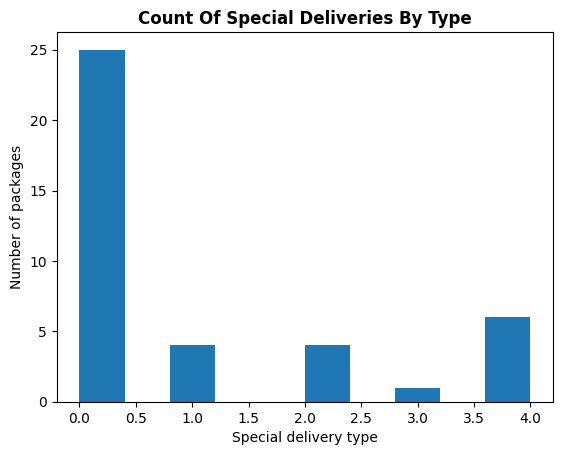

In [47]:
spec = []
for bucket in myHash.table:
    for package in bucket:
        spec.append(int(package[1].special[0]))
pyplot.hist(spec)
pyplot.xlabel('Special delivery type')
pyplot.ylabel('Number of packages')
pyplot.title('Count Of Special Deliveries By Type', fontweight = "bold")
pyplot.show()

In [51]:
# While there are still events to be processed, the highest priority event, which will always be the event occuring at the earliest time, will be taken off, and have its execute function called. The execution function depends on the type of event that was popped off the queue. All events have an execute function that takes no paramaters.
while (schedule):
    event = heapq.heappop(schedule)
    event.execute()

The time is 759. Input your choice. 1 - View all package delivery statuses. 2 - Search for package information by package ID. 3 - View truck mileages. 4 - Schedule another check for a later time. 5 - End all checks.  5


Total combined miles: 129.29999999999998


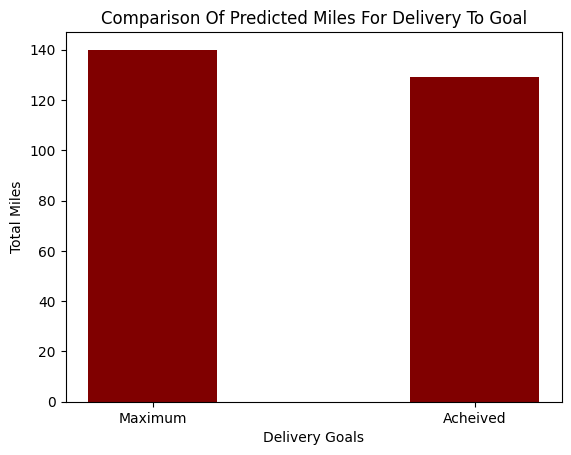

Percent failed: 0.0%


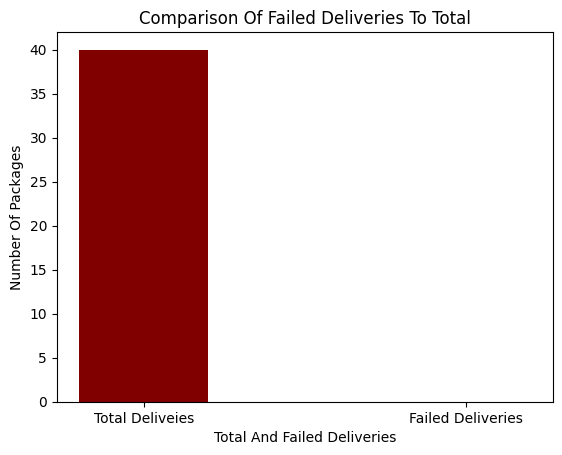

Truck 1 route: ['Cottonwood Regional Softball Complex 4300 S 1300 E', 'Holiday City Office 4580 S 2300 E', 'Housing Auth. of Salt Lake County 3595 Main St', 'Salt Lake City Division of Health Services 177 W Price Ave', 'Redwood Park 3060 Lester St', 'Salt Lake City Streets and Sanitation 2010 W 500 S', 'International Peace Gardens 1060 Dalton Ave S', 'Western Governors University 4001 South 700 East, Salt Lake City, UT 84107', 'City Center of Rock Springs 5383 South 900 East #104', 'Taylorsville City Hall 2600 Taylorsville Blvd', 'Valley Regional Softball Complex 5100 South 2700 West', 'Redwood Park 3060 Lester St', 'Salt Lake County Mental Health 3148 S 1100 W', 'Salt Lake County/United Police Dept 3365 S 900 W', 'Rice Terrace Pavilion Park 600 E 900 South', 'Western Governors University 4001 South 700 East, Salt Lake City, UT 84107']

Truck 1 packages: [[15, 13, 16, 20, 14, 19], [6, 25, 11, 23, 10, 17]]

Truck 2 route: ['Holiday City Office 4580 S 2300 E', 'Sugar House Park 1330 2100

In [53]:
# Once the program is done, the total truck mileage is posted, and all package statuses are posted as well.
print("Total combined miles: " + str(truck1.mileage + truck2.mileage))

# creating the bar plot
pyplot.bar(['Maximum', 'Acheived'], [140, truck1.mileage + truck2.mileage], color ='maroon',
        width = 0.4)
 
pyplot.xlabel("Delivery Goals")
pyplot.ylabel("Total Miles")
pyplot.title("Comparison Of Predicted Miles For Delivery To Goal")
pyplot.show()

total = 0
count = 0
for bucket in myHash.table:
    for package in bucket:
        total += 1
        if (package[1].deliveryTime > package[1].deadline):
            count += 1

print("Percent failed: " + str((count * 100) / total) + "%")
# creating the bar plot
pyplot.bar(['Total Deliveies', 'Failed Deliveries'], [total, count], color ='maroon',
        width = 0.4)
 
pyplot.xlabel("Total And Failed Deliveries")
pyplot.ylabel("Number Of Packages")
pyplot.title("Comparison Of Failed Deliveries To Total")
pyplot.show()

print("Truck 1 route: " + str(truck1.route))
print()
print("Truck 1 packages: " + str(truck1.packageLoads))
print()
print("Truck 2 route: " + str(truck2.route))
print()
print("Truck 2 packages: " + str(truck2.packageLoads))

# Map Of Delivery Area
<img src="map.png">